# Implementation 1

Here are some examples of code implementation for data exploration.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

## Load data set

In [3]:
dataset = pd.read_csv('iris.csv')

*This small dataset from 1936 is often used for testing out machine learning algorithms and visualizations. Each row of the table represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters.*

## Basic information on the data set

**Info on the dimensions of the data set:**

In [4]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
dataset.shape

(150, 5)

In [6]:
type(dataset)

pandas.core.frame.DataFrame

In [7]:
dataset['sepal_width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [8]:
dataset.iloc[0,:]

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

In [9]:
type(dataset.values)

numpy.ndarray

In [10]:
dataset.values[0,:]

array([5.1, 3.5, 1.4, 0.2, 'setosa'], dtype=object)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Display several lines of the data set:**

In [12]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [14]:
dataset.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species
64,5.6,2.9,3.6,1.3,versicolor
16,5.4,3.9,1.3,0.4,setosa
101,5.8,2.7,5.1,1.9,virginica
51,6.4,3.2,4.5,1.5,versicolor
87,6.3,2.3,4.4,1.3,versicolor


**List of column names:**

In [15]:
dataset.columns.values

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'], dtype=object)

## Statistics

**Count number of null elements in the columns of the data set:**

In [16]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Count number of 'setosa' in the 'species' column:**

In [17]:
nb_setosa = (dataset['species']=='setosa').sum()
print(nb_setosa)

50


**Compute the proportion of 'setosa' in the 'species' column:**

In [18]:
ratio = (dataset['species']=='setosa').sum() / len(dataset)
print(ratio)

0.3333333333333333


**Table of statistics on each feature:**

In [19]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Plot

### Simple plots

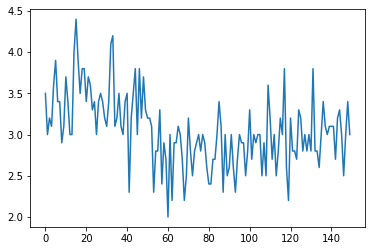

In [20]:
plt.plot(dataset['sepal_width'])
plt.show()

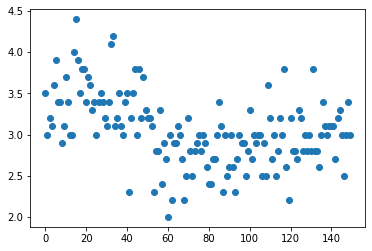

In [21]:
plt.scatter(dataset.index, dataset['sepal_width'])
plt.show()

### Histograms/distributions

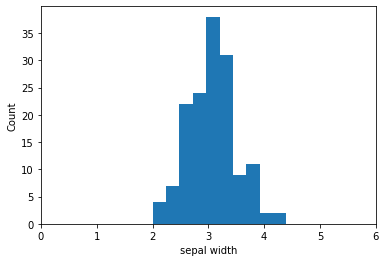

In [22]:
plt.hist(dataset['sepal_width'])
plt.xlabel('sepal width')
plt.ylabel('Count')
plt.xlim((0, 6))
plt.show()

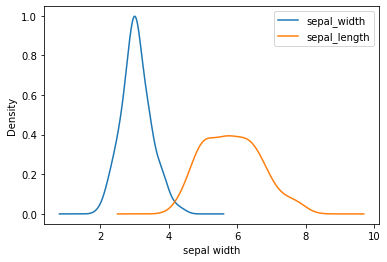

In [23]:
dataset[['sepal_width', 'sepal_length']].plot(kind='density')
plt.xlabel('sepal width')
plt.show()

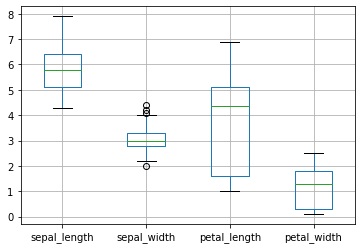

In [24]:
dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].boxplot()
plt.show()

### Scatter plot feature vs. feature

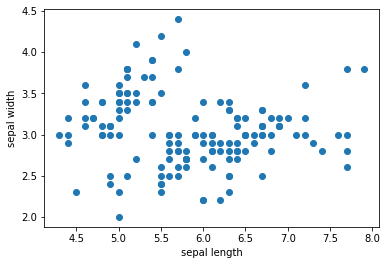

In [25]:
plt.scatter(dataset['sepal_length'], dataset['sepal_width'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

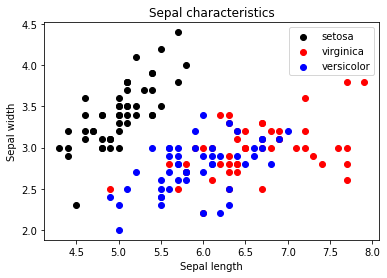

In [26]:
plt.scatter(dataset[dataset['species']=='setosa']['sepal_length'], dataset[dataset['species']=='setosa']['sepal_width'], color = 'black', label = 'setosa')
plt.scatter(dataset[dataset['species']=='virginica']['sepal_length'], dataset[dataset['species']=='virginica']['sepal_width'], color = 'red', label = 'virginica')
plt.scatter(dataset[dataset['species']=='versicolor']['sepal_length'], dataset[dataset['species']=='versicolor']['sepal_width'], color = 'blue', label = 'versicolor')
plt.title('Sepal characteristics')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

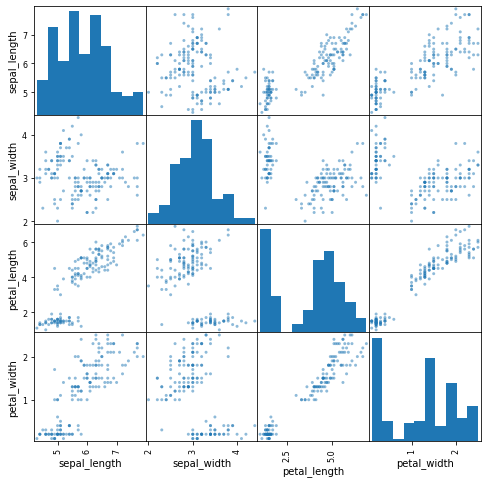

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset.iloc[:,:4], figsize = [8,8])
plt.show()

### Bars

Display the count of each value within 'species' column:

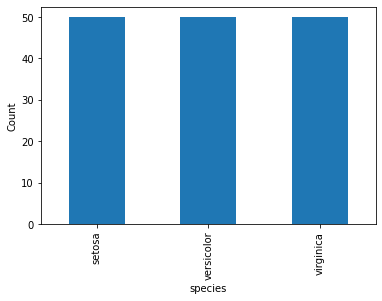

In [28]:
df_plot = dataset.groupby(['species']).size()
df_plot.plot(kind='bar')
plt.ylabel('Count')
plt.show()

Now let's add a new column in the data set with a feature engineered on the existing ones. Its values are booleans telling if the sepal is long or not (i.e. above a length threshold or not).

In [29]:
dataset['long_sepal'] = dataset['sepal_length'] > 6
dataset.sample(n=7)
# dataset = dataset.drop(columns='long_sepal')

,sepal_length,sepal_width,petal_length,petal_width,species,long_sepal
24,4.8,3.4,1.9,0.2,setosa,False
133,6.3,2.8,5.1,1.5,virginica,True
123,6.3,2.7,4.9,1.8,virginica,True
11,4.8,3.4,1.6,0.2,setosa,False
80,5.5,2.4,3.8,1.1,versicolor,False
132,6.4,2.8,5.6,2.2,virginica,True
91,6.1,3.0,4.6,1.4,versicolor,True


Display the repartition of long sepal vs. short sepal for each species:

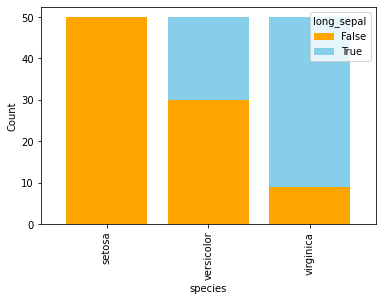

In [30]:
df_plot = dataset.groupby(['species', 'long_sepal']).size().reset_index().pivot(index='species', columns='long_sepal', values=0)
df_plot.plot(kind='bar', stacked=True, color=['orange', 'skyblue'], width=0.8)
plt.ylabel('Count')
plt.show()

### Correlation matrix

In [31]:
correlation = dataset.iloc[:,:4].corr()
correlation

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


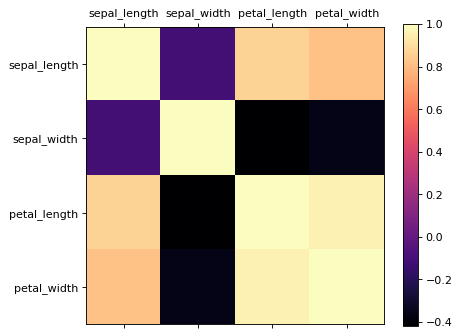

In [32]:
fig = plt.figure(figsize=(6,5), dpi= 80)
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(correlation, cmap = plt.cm.magma)
fig.colorbar(cax)
ticks = np.arange(0,4)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = dataset.iloc[:,:4].columns
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

Colormaps: https://matplotlib.org/tutorials/colors/colormaps.html